# 데이터 준비


pandas 가져오기- 표 테이터 다룰 때 가장 많이쓰는 바로 그 라이브러리  -*판다스*

In [21]:
import pandas as pd
print("가 즈 아!!~~")

가 즈 아!!~~


**(1)데이터 가져오기**

In [22]:
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes()

In [23]:
diabetes.keys()  # 데이터 확인하기

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [24]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


**모델에 예측할 데이터 X와 y 준비하기**

In [26]:
import numpy as np
X = np.array(df_X)  # df_X에 있는 값들을 numpy array로 변환해서 저장
y = np.array(df_y)  # df_y에 있는 값들을 numpy array로 변환해서 저장

print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

**train 데이터와 test 데이터로 분리하기**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("가자고~~!!")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

가자고~~!!
(353, 10) (353,)
(89, 10) (89,)


**모델 준비하기**

In [28]:
w = np.random.rand(10)
b = np.random.rand()

print(w)
print(b)

[0.2930301  0.00775881 0.20118286 0.2053652  0.29989289 0.62361028
 0.57493194 0.87826285 0.54354082 0.66795308]
0.013826505997911687


In [29]:
def model(X, w, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i]
    predictions += b
    return predictions
print("나 그냥 갈까?")


나 그냥 갈까?


**손실함수 loss정의하기**

In [30]:
def MSE(a, b):
    mse = ((a-b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    return mse
print("왔으요?")

왔으요?


In [31]:
def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L
    print("갈끄나?")

**기울기를 구하는 gradient 함수 구현하기**

In [32]:
def gradient(X, w, b, y):
    #N은 가중치의 개수
    N = len(w)

    # y_pred 준비
    y_pred = model(X,w, b)

    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dw, db 
print("잔다~")

잔다~


In [33]:
dw, db = gradient(X, w, b, y)
print("dw:", dw)
print("db:", db)

dw: [ -60.26167087  -13.54469074 -189.27476348 -142.29579226  -67.827052
  -55.60140134  127.51794675 -138.63540264 -182.47211734 -123.14186894]
db: -304.23931531379606


**하이퍼 파라미터인 학습률 설정하기**

In [34]:
LEARNING_RATE =0.01

In [35]:
losses = []

for i in range(1, 1501):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 21832.0111
Iteration 20 : Loss 16588.5729
Iteration 30 : Loss 13088.0117
Iteration 40 : Loss 10751.0091
Iteration 50 : Loss 9190.8076
Iteration 60 : Loss 8149.2046
Iteration 70 : Loss 7453.8221
Iteration 80 : Loss 6989.5793
Iteration 90 : Loss 6679.6470
Iteration 100 : Loss 6472.7338
Iteration 110 : Loss 6334.5969
Iteration 120 : Loss 6242.3756
Iteration 130 : Loss 6180.8079
Iteration 140 : Loss 6139.7048
Iteration 150 : Loss 6112.2641
Iteration 160 : Loss 6093.9444
Iteration 170 : Loss 6081.7141
Iteration 180 : Loss 6073.5490
Iteration 190 : Loss 6068.0979
Iteration 200 : Loss 6064.4587
Iteration 210 : Loss 6062.0292
Iteration 220 : Loss 6060.4072
Iteration 230 : Loss 6059.3243
Iteration 240 : Loss 6058.6014
Iteration 250 : Loss 6058.1188
Iteration 260 : Loss 6057.7966
Iteration 270 : Loss 6057.5815
Iteration 280 : Loss 6057.4379
Iteration 290 : Loss 6057.3420
Iteration 300 : Loss 6057.2780
Iteration 310 : Loss 6057.2353
Iteration 320 : Loss 6057.2067
Iteration 330

모델 **학습하기**

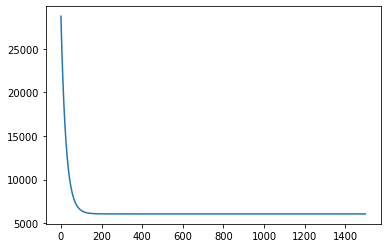

In [36]:
# 정의된 손실함수와 기울기 함수로 모델을 학습
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

**test 데이터에 대한 성능 확인**

In [37]:
w, b

(array([  752.08301328,    24.6949037 ,  2358.99977568,  1775.99921947,
          773.34492203,   595.60855758, -1490.54929019,  1668.74527019,
         2175.06686996,  1559.25574109]), 153.7308701399846)

In [38]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

5342.464020810699

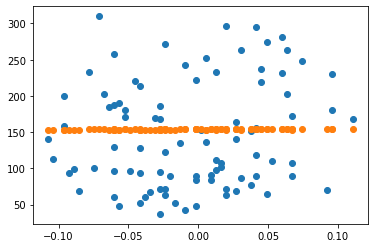

In [39]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()